In [1]:
import model
import torch
import torch.nn as nn

In [2]:
net = model.Segmentator()

In [3]:
rand_im = torch.rand((16, 3, 64, 64))

In [4]:
print(net.toggle_debug())

True


In [5]:
f1, f2, f3, f4, output = net(rand_im)

In [6]:
import matplotlib.pyplot as plt

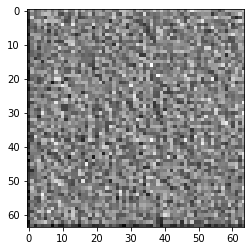

In [7]:
plt.imshow(f1.detach().numpy()[0, 2], cmap="gray")
plt.show()

In [8]:
output.shape

torch.Size([16, 16, 64, 64])

In [9]:
plt.imshow(output[0, 0].detach(), cmap="gray")
plt.show()

TypeError: Invalid shape (16, 64, 64) for image data